# Labo 6 - Correlatie en lineaire regressie

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

## Voorbeeld - Heart disease

Voor meer uitleg over de gebruikte dataset kan je terecht op: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning/data

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data exploration

In [3]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Correlatiecoefficient via Pandas
correlatiecoefficienten = dataset.corr()
print(correlatiecoefficienten)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

Text(0.5, 1.0, 'heatmap dataset')

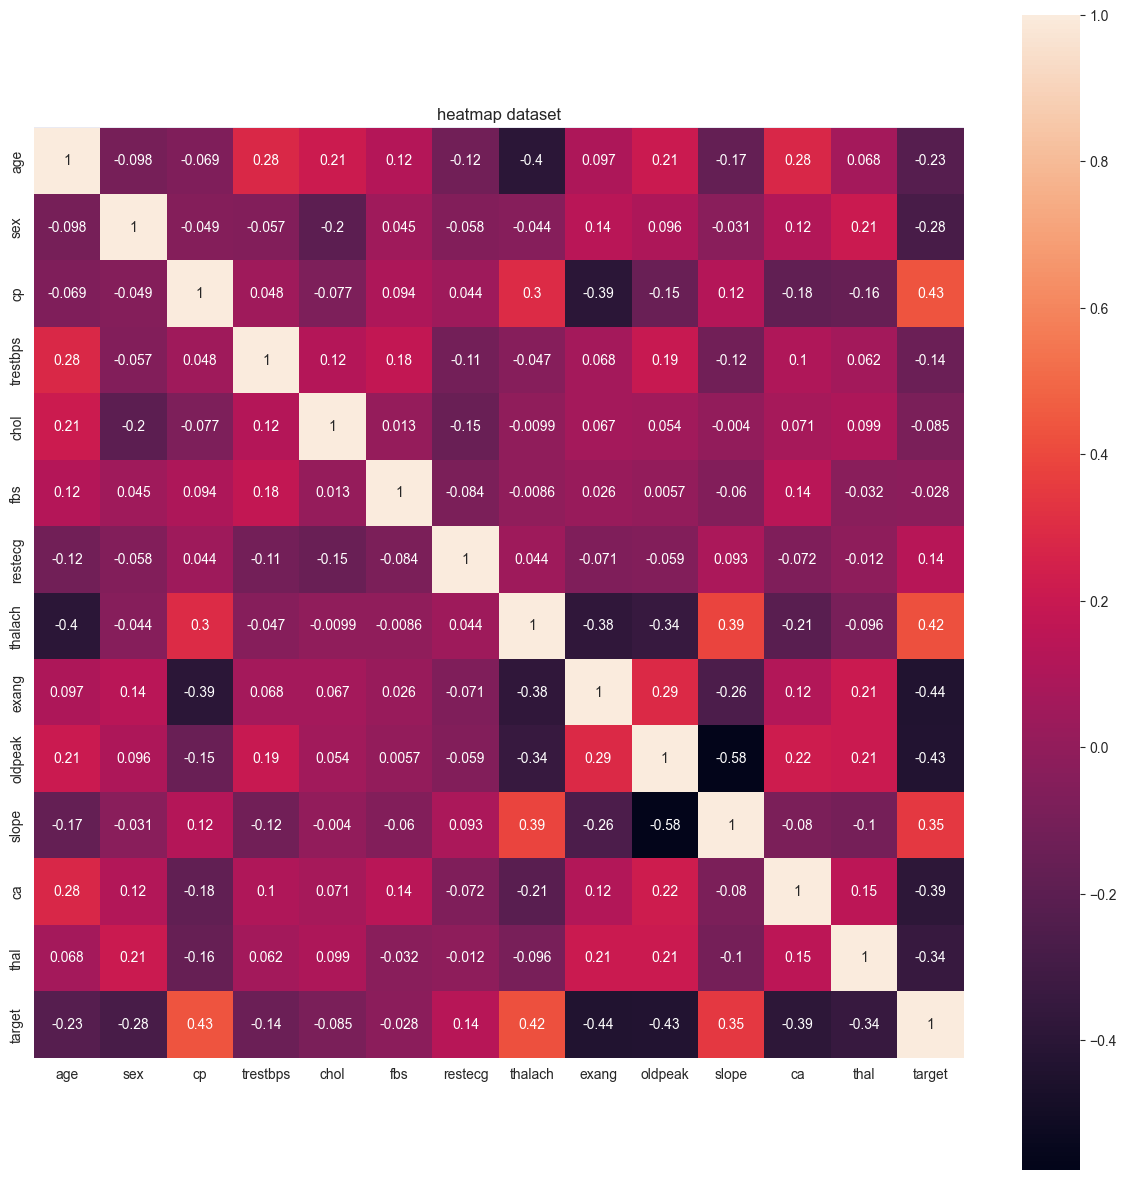

In [5]:
# Visualiseer de onderlinge correlatiecoëfficiënten
plt.figure(figsize=(15,15))
sns.heatmap(data= correlatiecoefficienten,square=True, annot=True)
plt.title("heatmap dataset")

In [6]:
corr = np.corrcoef(dataset['age'],dataset['thalach'])
print(corr)

# Hoe ouder de patiënt hoe lager zijn maximale hartslag.

[[ 1.         -0.39852194]
 [-0.39852194  1.        ]]


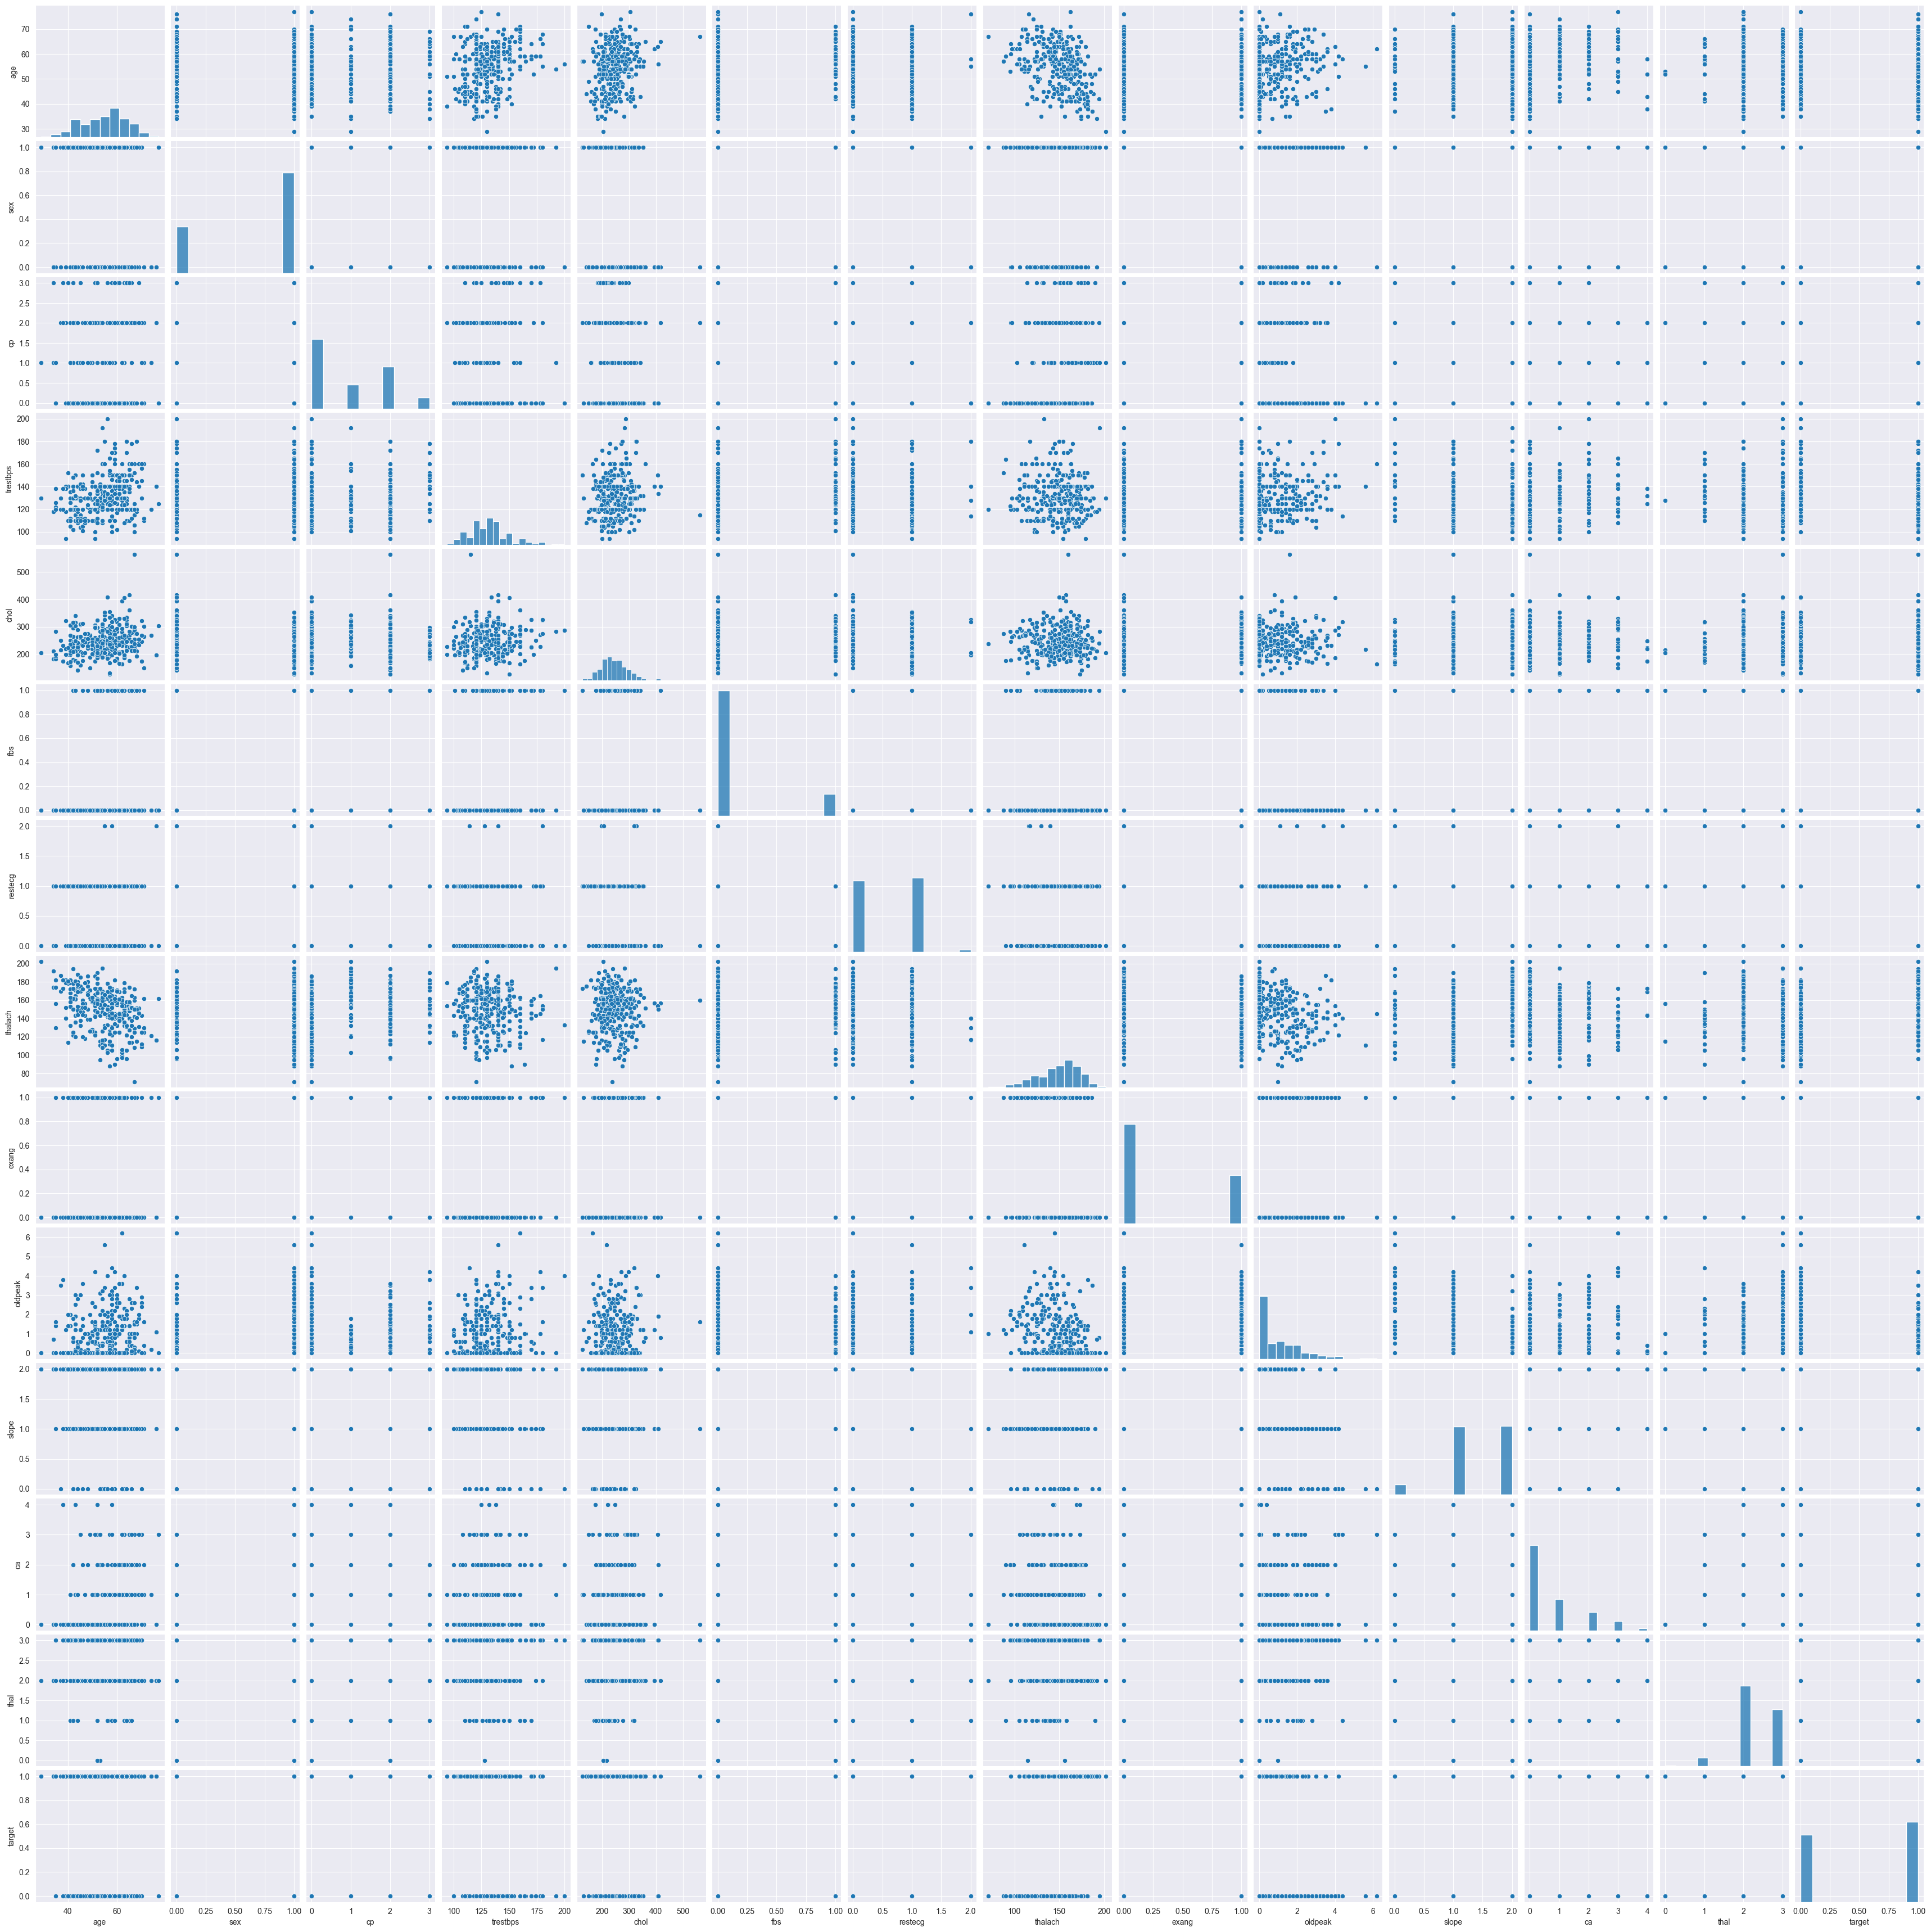

In [7]:
# pairplot
sns.pairplot(dataset);

Text(0.5, 1.0, 'leeftijd vs maximale hartslag')

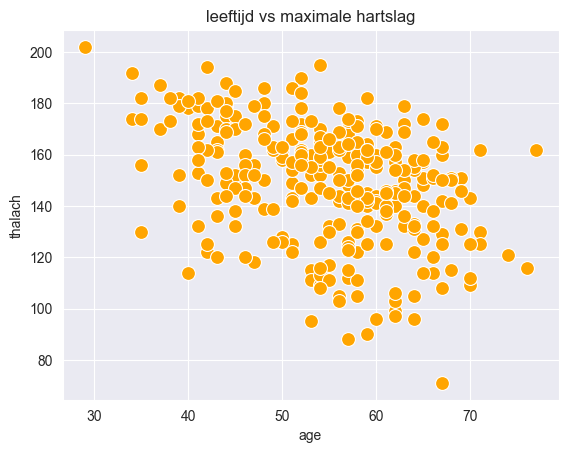

In [8]:
## Scatterplot tussen 'age' en 'thalach'
sns.scatterplot(x='age', y='thalach', data=dataset,color='orange',s=100)
sns.set_style("darkgrid")
plt.title("leeftijd vs maximale hartslag")



Text(0.5, 1.0, 'leeftijd vs maximale hartslag opgesplitst per geslacht')

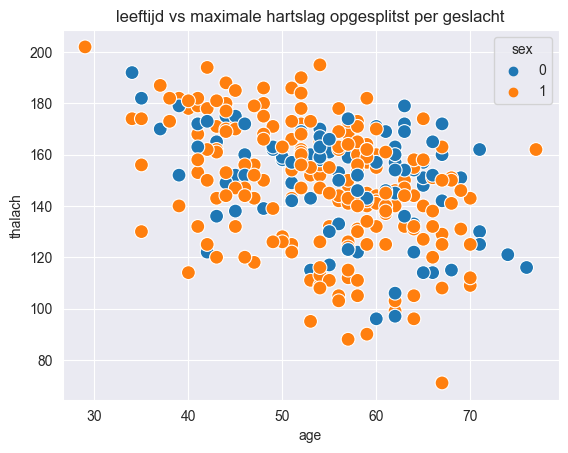

In [9]:
## Scatterplot tussen 'age' en 'thalach' volgens geslacht (ander kleur)
# Scatterplot
sns.scatterplot(x='age', y='thalach', data=dataset,color='orange',hue = 'sex',s=100)
sns.set_style("darkgrid")
plt.title("leeftijd vs maximale hartslag opgesplitst per geslacht")



In [10]:
# Tekenen van de regressielijn tussen 'age' en 'thalach'

# Regressielijn
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

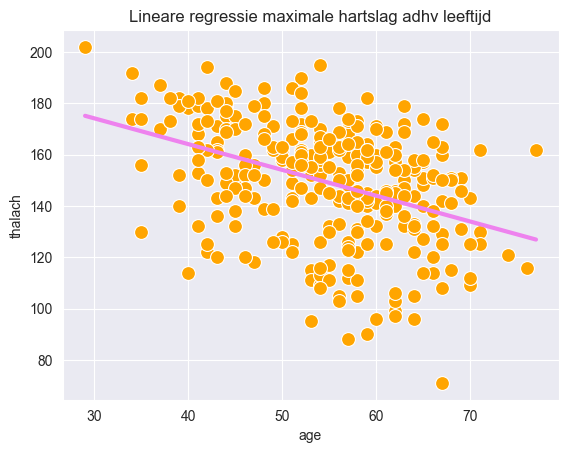

In [11]:
regressielijn = find_regressionline(dataset, 'age', 'thalach')
plot_regressionline(dataset, 'age', 'thalach', regressielijn, 'Lineare regressie maximale hartslag adhv leeftijd')

In [12]:
score = regressielijn.score(dataset['age'].values.reshape(-1,1), dataset['thalach'])
print('De R²-score bedraagt {:.2f}'.format(score) )
# Het model kan niet bijzonder goed de maximale hartslag voorspellen uit de leeftijd

De R²-score bedraagt 0.16


In [13]:
x_value= np.array([[80]])
cholesterol = regressielijn.predict(x_value)

print('De voorspelde maximale hartslag bedraagt: ',cholesterol[0])

De voorspelde maximale hartslag bedraagt:  123.88306377248466


### Voorspelling van de maximale hartslag opgesplitst per leeftijd

In [14]:
mannen = dataset[dataset.sex==0]

regressielijn_mannen = find_regressionline(mannen, 'age', 'thalach')
mannen_score = regressielijn_mannen.score(mannen['age'].values.reshape(-1,1),mannen['thalach'])
print(mannen_score)
print(regressielijn_mannen.intercept_)
print(regressielijn_mannen.coef_[0])


0.16435189894344937
199.2169594590411
-0.8637657826132732


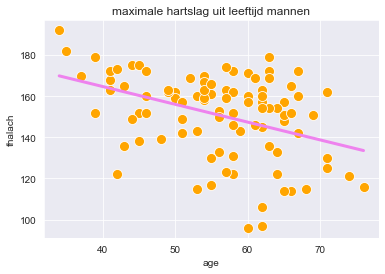

In [15]:
plot_regressionline(mannen, 'age', 'thalach', regressielijn_mannen, 'maximale hartslag uit leeftijd mannen')

In [16]:
vrouwen = dataset[dataset.sex==1]

regresielijn_vrouwen = find_regressionline(vrouwen, 'age', 'thalach')
print("intercept: ", regresielijn_vrouwen.intercept_)
print("rico: ",regresielijn_vrouwen.coef_[0])
score = regresielijn_vrouwen.score(vrouwen.age.values.reshape(-1,1), vrouwen.thalach.values)
print("R-squared value vrouwen: ", round(score, 2))


intercept:  208.6254270678881
rico:  -1.1098547270895793
R-squared value vrouwen:  0.17


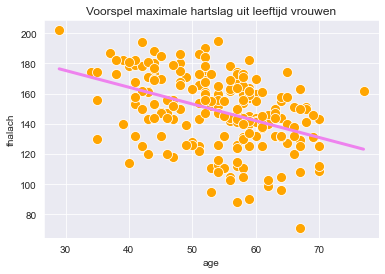

In [17]:
plot_regressionline(vrouwen, 'age', 'thalach', regresielijn_vrouwen, 'Voorspel maximale hartslag uit leeftijd vrouwen')

### Voorspelling van de maximale hartslag opgesplitst per  ca (number of major vessels (0-3) colored by flourosopy 

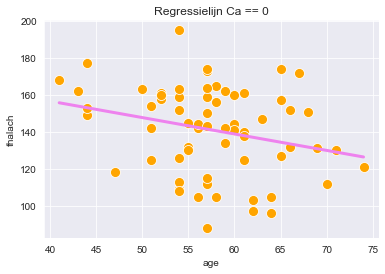

In [18]:
ca_val = 1 # varieer tussen 0 en 3

df = dataset[dataset.ca ==ca_val ]

regressielijn_ca_0 = find_regressionline(df, 'age', 'thalach')
plot_regressionline(df, 'age', 'thalach', regressielijn_ca_0, "Regressielijn Ca == 0")

In [19]:
score = regressielijn_ca_0.score(df['age'].values.reshape(-1,1), df['thalach'])
print(round(score, 2))

0.07
